In [2]:
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Load Ames Housing dataset from OpenML
ames = fetch_openml(name="house_prices", as_frame=True)

In [8]:
ames

{'data':           Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
 0        1.0        60.0       RL         65.0   8450.0   Pave  None      Reg   
 1        2.0        20.0       RL         80.0   9600.0   Pave  None      Reg   
 2        3.0        60.0       RL         68.0  11250.0   Pave  None      IR1   
 3        4.0        70.0       RL         60.0   9550.0   Pave  None      IR1   
 4        5.0        60.0       RL         84.0  14260.0   Pave  None      IR1   
 ...      ...         ...      ...          ...      ...    ...   ...      ...   
 1455  1456.0        60.0       RL         62.0   7917.0   Pave  None      Reg   
 1456  1457.0        20.0       RL         85.0  13175.0   Pave  None      Reg   
 1457  1458.0        70.0       RL         66.0   9042.0   Pave  None      Reg   
 1458  1459.0        20.0       RL         68.0   9717.0   Pave  None      Reg   
 1459  1460.0        20.0       RL         75.0   9937.0   Pave  None      Reg   
 
      

In [9]:
type(ames)

sklearn.utils.Bunch

In [25]:
# Features and Target
x = ames.data
y = ames.target


In [28]:
x.shape

(1460, 80)

In [29]:
type(x)

pandas.core.frame.DataFrame

In [30]:
x

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1.0,60.0,RL,65.0,8450.0,Pave,None,Reg,Lvl,AllPub,...,0.0,0.0,None,None,None,0.0,2.0,2008.0,WD,Normal
1,2.0,20.0,RL,80.0,9600.0,Pave,None,Reg,Lvl,AllPub,...,0.0,0.0,None,None,None,0.0,5.0,2007.0,WD,Normal
2,3.0,60.0,RL,68.0,11250.0,Pave,None,IR1,Lvl,AllPub,...,0.0,0.0,None,None,None,0.0,9.0,2008.0,WD,Normal
3,4.0,70.0,RL,60.0,9550.0,Pave,None,IR1,Lvl,AllPub,...,0.0,0.0,None,None,None,0.0,2.0,2006.0,WD,Abnorml
4,5.0,60.0,RL,84.0,14260.0,Pave,None,IR1,Lvl,AllPub,...,0.0,0.0,None,None,None,0.0,12.0,2008.0,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456.0,60.0,RL,62.0,7917.0,Pave,None,Reg,Lvl,AllPub,...,0.0,0.0,None,None,None,0.0,8.0,2007.0,WD,Normal
1456,1457.0,20.0,RL,85.0,13175.0,Pave,None,Reg,Lvl,AllPub,...,0.0,0.0,None,MnPrv,None,0.0,2.0,2010.0,WD,Normal
1457,1458.0,70.0,RL,66.0,9042.0,Pave,None,Reg,Lvl,AllPub,...,0.0,0.0,None,GdPrv,Shed,2500.0,5.0,2010.0,WD,Normal
1458,1459.0,20.0,RL,68.0,9717.0,Pave,None,Reg,Lvl,AllPub,...,0.0,0.0,None,None,None,0.0,4.0,2010.0,WD,Normal


In [31]:
x.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


In [32]:
ames.DESCR

"Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.\n\nWith 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.\n\nMSSubClass: Identifies the type of dwelling involved in the sale.\t\n\n        20\t1-STORY 1946 & NEWER ALL STYLES\n        30\t1-STORY 1945 & OLDER\n        40\t1-STORY W/FINISHED ATTIC ALL AGES\n        45\t1-1/2 STORY - UNFINISHED ALL AGES\n        50\t1-1/2 STORY FINISHED ALL AGES\n        60\t2-STORY 1946 & NEWER\n        70\t2-STORY 1945 & OLDER\n        75\t2-1/2 STORY ALL AGES\n        80\tSPLIT OR MULTI-LEVEL\n        85\tSPLIT FOYER\n        90\tDUPLEX - ALL STYLES AND AGES\n       120\t1-STORY PUD

In [33]:
print("Shape of dataset:", x.shape)
print("Target variable:", y.name)
print("First 5 columns:", x.columns[:5])

Shape of dataset: (1460, 80)
Target variable: SalePrice
First 5 columns: Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea'], dtype='object')


In [37]:
# Split data for training and testing

x_train, x_test, y_train, y_test = train_test_split(x,y)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1095, 80)
(365, 80)
(1095,)
(365,)


In [40]:
# Train model
model = LinearRegression()
model.fit(x_train, y_train)

ValueError: could not convert string to float: 'RL'

In [46]:
 # keep only numbers, replace NaNs with 0
x_num = x.select_dtypes(include="number").fillna(0)

x_train, x_test, y_train, y_test = train_test_split(x_num,y)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(1095, 80)
(365, 80)
(1095,)
(365,)


In [49]:
# Train model
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

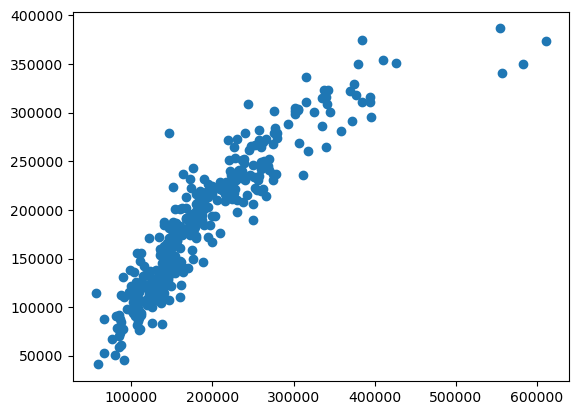

In [53]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred) # x and y resp.
plt.show()